In [1]:
import collections
import json
import datetime
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tqdm

In [2]:
LANGUAGES = [
     "rust",
    "python",
    "javascript",
    "java",
    "ruby",
    "r",
]

In [3]:
def plot_libs_and_pairs(plotter, language: str):
    with open(f"data/results/{language}/{language}_post_to_libs.json") as handle:
        post_to_libs = json.load(handle)

    t0 = time.time()
    xs_libs = [d[0] for d in post_to_libs['distinct_libs_plot']]
    ys_libs = [d[1] for d in post_to_libs['distinct_libs_plot']]
    xs_pairs = [d[0] for d in post_to_libs['distinct_pairs_plot']]
    ys_pairs = [d[1] for d in post_to_libs['distinct_pairs_plot']]
    t1 = time.time()
    print(f"Segments formed (took {round(t1 - t0, 2)} seconds).")
    
    # Unique libs line fit
    libs_a, libs_b  = np.polyfit(range(len(xs_libs)), ys_libs, 1)
    pairs_a, pairs_b = np.polyfit(range(len(xs_pairs)), ys_pairs, 1)
    t2 = time.time()
    print(f"Fits performed (took {round(t2 - t1, 2)} seconds).")
    
    
    step_size = len(xs_libs) // 100
    plotter.plot(range(0, len(xs_libs), step_size), ys_libs[::step_size], "*", label="Unique libraries")
    plotter.plot(range(0, len(xs_pairs), step_size), ys_pairs[::step_size], "^", label="Unique pairs")
    
    plotter.plot(range(0, len(xs_libs), step_size), [libs_a * x + libs_b for x in range(len(xs_libs))][::step_size], label=f"Libs fit (slope: {round(libs_a,4)})")
    plotter.plot(range(0, len(xs_pairs), step_size), [pairs_a * x + pairs_b for x in range(len(xs_pairs))][::step_size], label=f"Pairs fit (slope: {round(pairs_a, 4)})")

    plotter.set_title(language)
    #plotter.xticks(rotation=90)
    plotter.legend(loc="upper left")

Segments formed (took 0.0 seconds).
Fits performed (took 0.0 seconds).
Segments formed (took 0.2 seconds).
Fits performed (took 0.62 seconds).
Segments formed (took 0.03 seconds).
Fits performed (took 0.07 seconds).
Segments formed (took 0.04 seconds).
Fits performed (took 0.09 seconds).
Segments formed (took 0.0 seconds).
Fits performed (took 0.0 seconds).
Segments formed (took 0.04 seconds).
Fits performed (took 0.09 seconds).


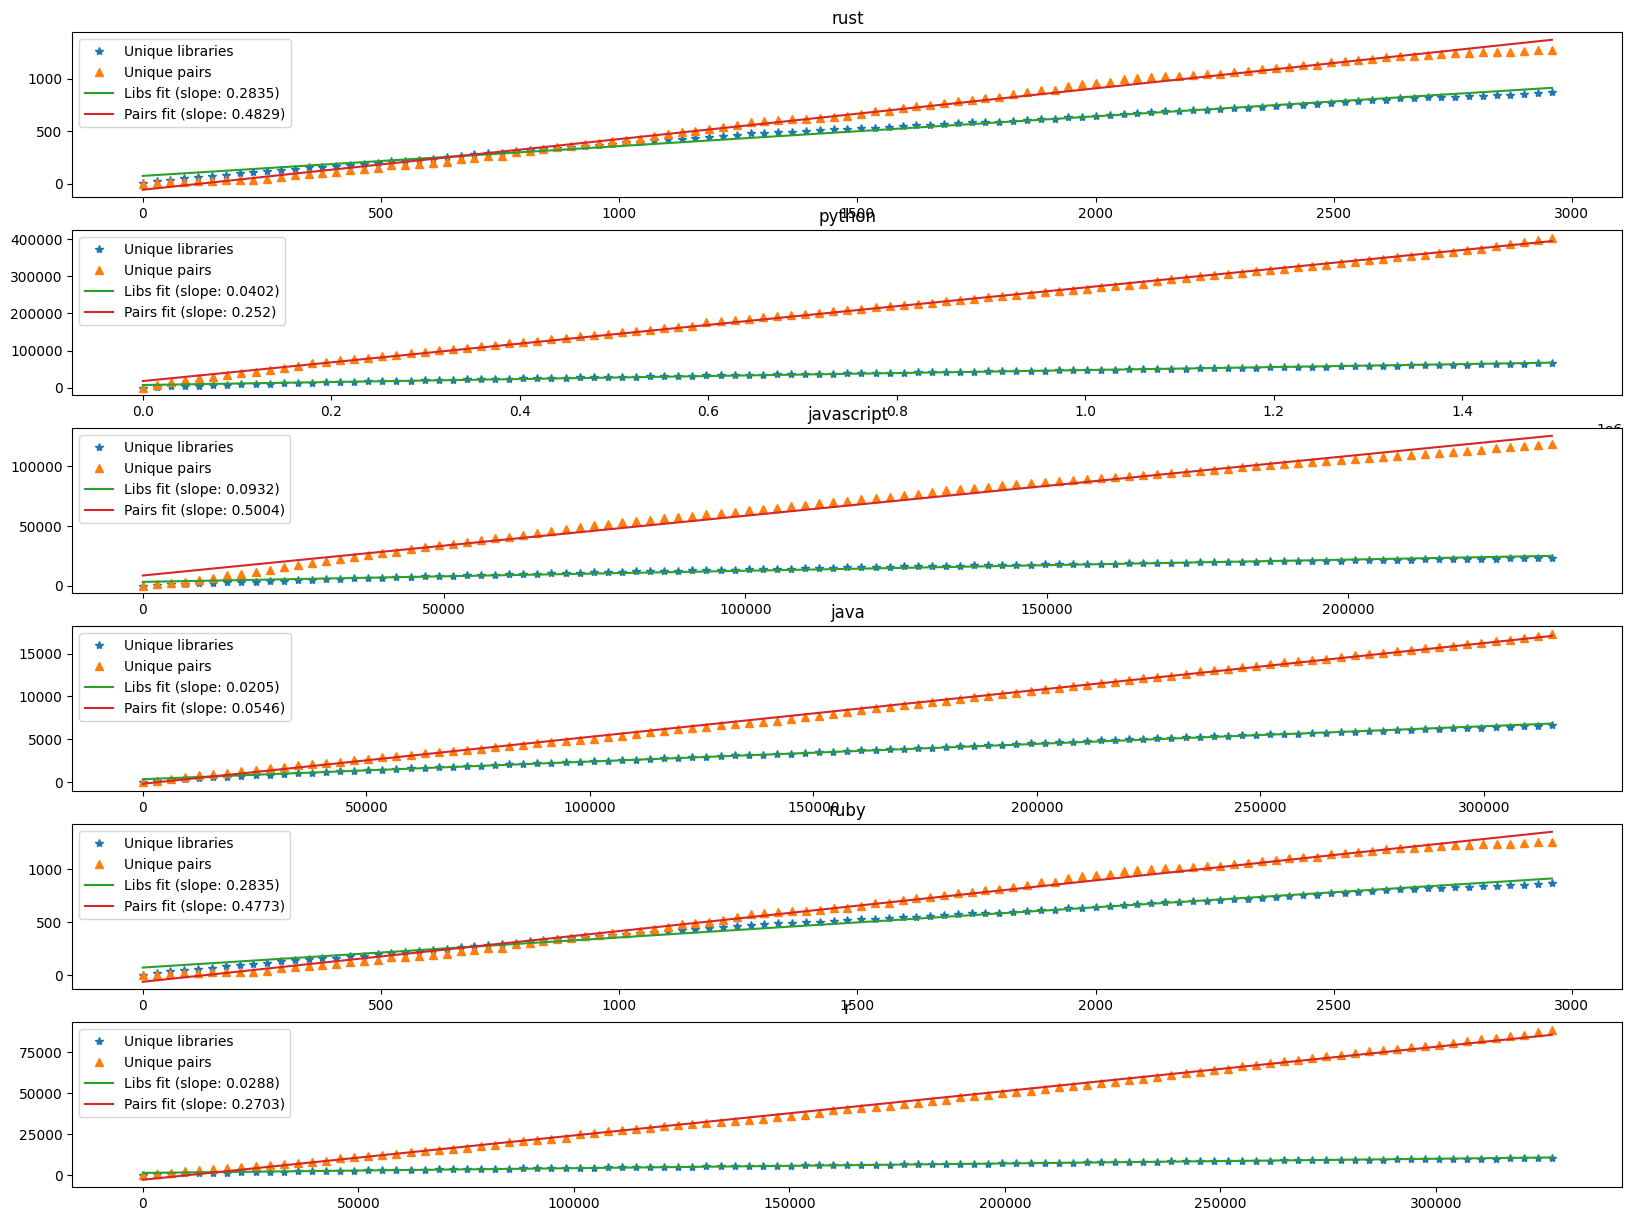

In [4]:
fig, axes = plt.subplots(nrows=len(LANGUAGES),ncols=1, figsize=(20,15))
for index, language in enumerate(LANGUAGES):
    plot_libs_and_pairs(axes[index], language)

In [5]:
fig.savefig("test_multiplot.png")

In [6]:
ls

data/                                  Randomized_User_Impact.ipynb
generate_extracted_import_metadata.py  README.md
generate_indiv_and_pair_lib_stats.py   requirements.txt
generate_post_to_new_libs.py           suspicious.jsonl
Impactful_Post_and_Users.ipynb         test_multiplot.png
Libs_and_Pairs.ipynb                   test_utils/
MULTI_Impact_per_year.ipynb            Time_Dist_of_Pair_App.ipynb
MULTI_Libs_and_Pairs.ipynb             utils/


In [7]:
pwd

'/home/gabor/CCL/SO_Post_Analyzer'